**Topic:**        Challenge Set 5  
**Subject:**      Linear Regression and Train/Test Split challenges  
**Date:**         01/29/2018  
**Name:**         Arina Igumenshcheva  
**Worked with:**  N/A  

In [359]:
# Import python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

import re

C:\Users\Arina\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [224]:
# Import the movies data
filepath = 'https://raw.githubusercontent.com/33eyes/nyc18_ds14/master/challenges/challenges_data/2013_movies.csv?token=ANE-v-MauItGvS7Y5l5d8R09FhJo3z-Bks5aeZN3wA%3D%3D'
movies_df = pd.read_csv(filepath,
        parse_dates =['ReleaseDate'])

movies_df.head(20)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08


In [225]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [226]:
# Create feature matrix X and target vector y
y, X = patsy.dmatrices('DomesticTotalGross ~ 1', data=movies_df, return_type="dataframe")

In [227]:
# Create OLS model
model = sm.OLS(y, X)
# Fit the model to the training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

C:\Users\Arina\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sat, 03 Feb 2018   Prob (F-statistic):                nan
Time:                        23:19:29   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
fit.fittedvalues.head()

0    1.005969e+08
1    1.005969e+08
2    1.005969e+08
3    1.005969e+08
4    1.005969e+08
dtype: float64

In [229]:
movies_df['DomesticTotalGross'].describe()

count    1.000000e+02
mean     1.005969e+08
std      8.739641e+07
min      2.556825e+07
25%      4.270413e+07
50%      6.954237e+07
75%      1.204759e+08
max      4.246680e+08
Name: DomesticTotalGross, dtype: float64

The results of this model can be interpreted as the exprected value of Domestic Total Gross when all other factors are 0.  This is also the average value of Domestic Total Gross, which is $100,596,900. Since the model doesn't have any additional information that it could use to predict Domestic Total Gross, it simply predicts the Domestic Total Gross of a movies to be the average value of Domestic Total Gross across all movies in the data set.

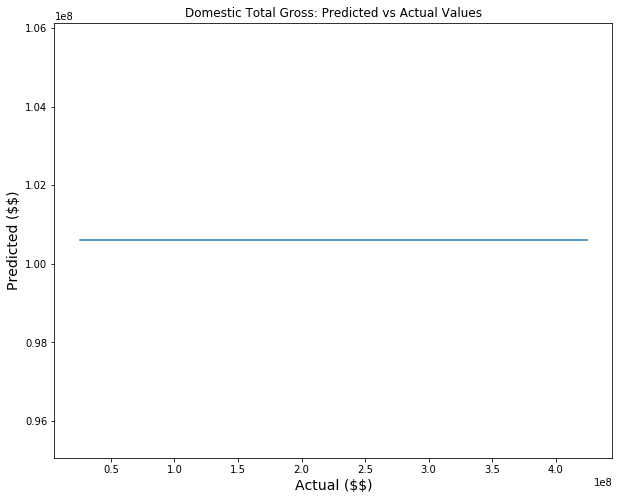

In [230]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y,fit.fittedvalues);

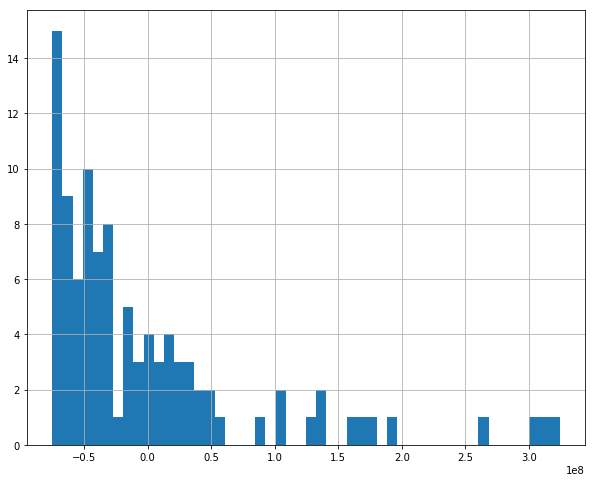

In [231]:
# Histogram of residuals
fit.resid.hist(figsize=(10,8), bins=50);

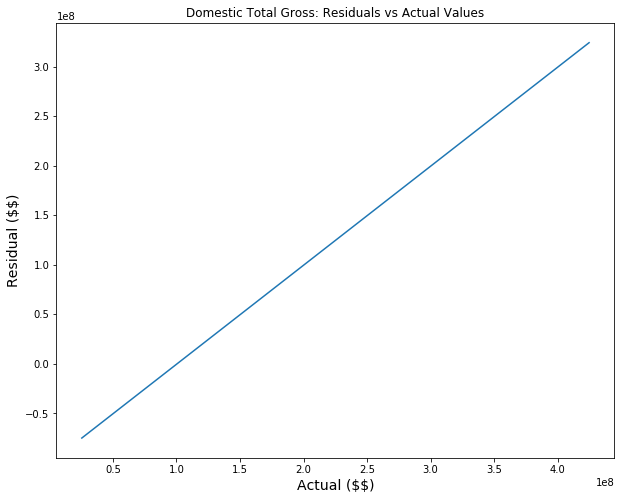

In [232]:
plt.figure(figsize=(10,8))
plt.ylabel('Residual (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Residuals vs Actual Values")

plt.plot(y,fit.resid);

In [233]:
fit.resid[:5]

0    3.240712e+08
1    3.084171e+08
2    3.001411e+08
3    2.674644e+08
4    1.904486e+08
dtype: float64

The residuals are highly skewed, showing that the predicted value overestimates a lot of actual values.

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [234]:
# Drop rows with missing values for Budget
movies_df = movies_df[pd.notnull(movies_df.Budget)]

In [235]:
movies_df.head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08
10,Star Trek Into Darkness,190000000.0,228778661,J.J. Abrams,PG-13,123,2013-05-16
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08


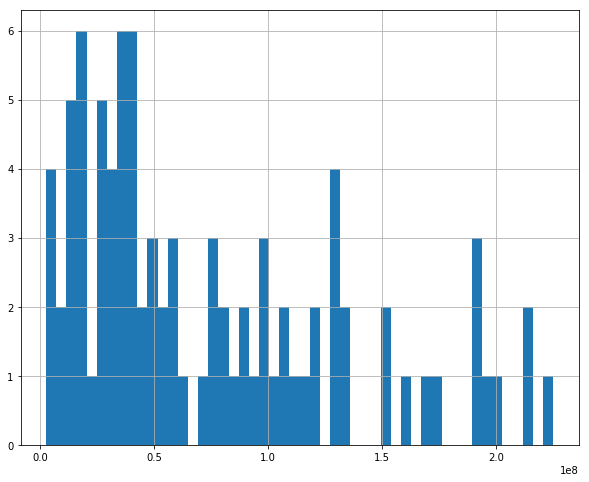

In [236]:
movies_df['Budget'].hist(figsize=(10,8), bins=50);

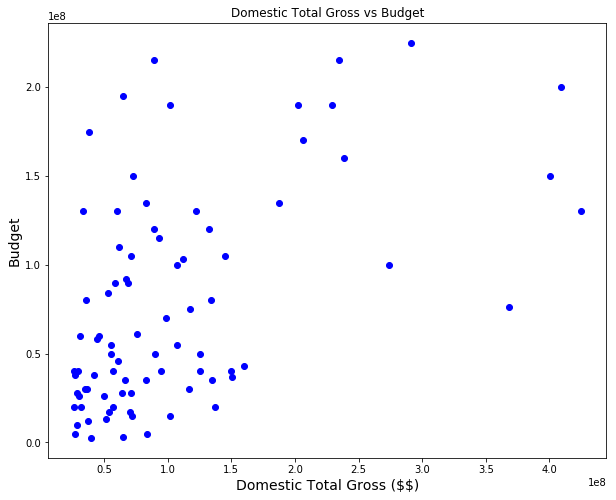

In [237]:
plt.figure(figsize=(10,8))
plt.ylabel('Budget', fontsize=14)
plt.xlabel('Domestic Total Gross (\$\$)', fontsize=14)
plt.title("Domestic Total Gross vs Budget")
plt.plot(movies_df2['DomesticTotalGross'],movies_df2['Budget'], 'bo');

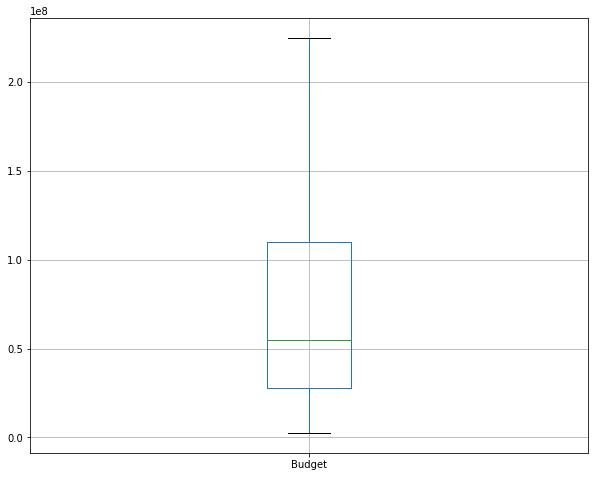

In [238]:
movies_df.boxplot(column='Budget', figsize=(10,8));

In [239]:
# Create feature matrix X and target vector y
y2, X2 = patsy.dmatrices('DomesticTotalGross ~ Budget', data=movies_df, return_type="dataframe")

# Create OLS model
model2 = sm.OLS(y2, X2)
# Fit the model to the training set
fit2 = model2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           6.80e-08
Time:                        23:19:31   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.44e+07   1.27e+07      3.504      0.001    1.92e+07    6.96e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

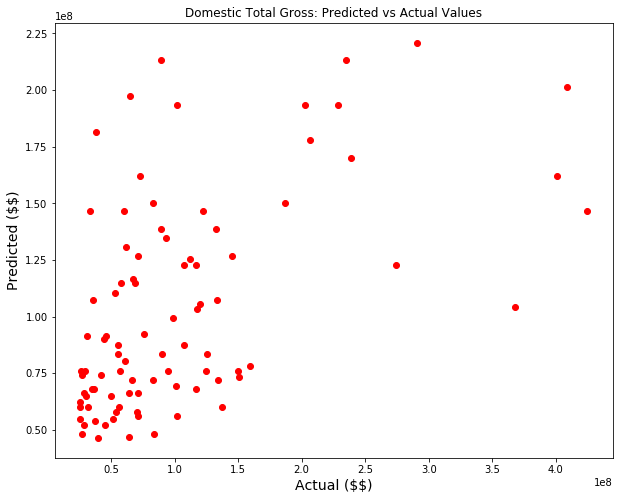

In [240]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y2,fit2.fittedvalues, 'ro');

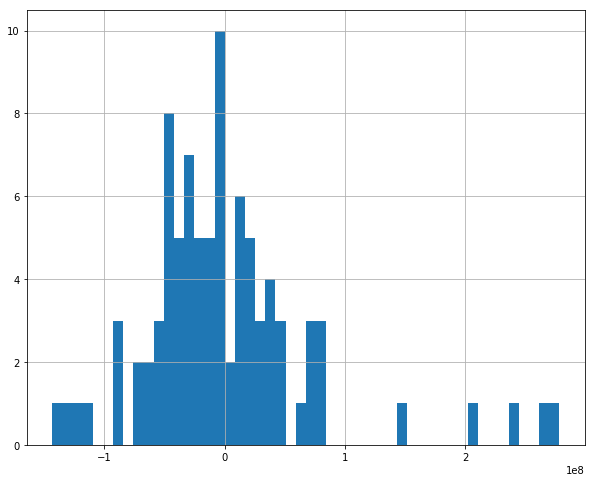

In [241]:
# Histogram of residuals
fit2.resid.hist(figsize=(10,8), bins=50);

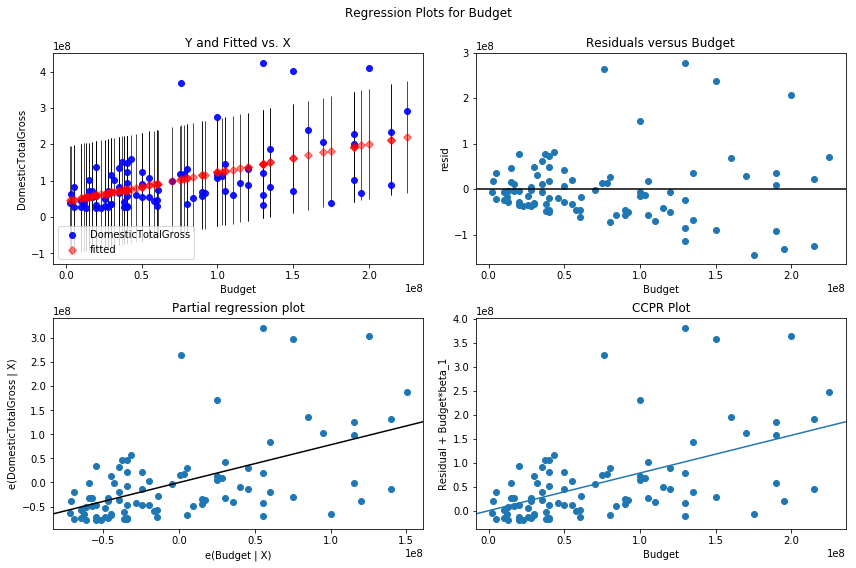

In [242]:
# Plots of model predictions against feature variable, and of residuals against feature variable
# (along with a couple more plots)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fit2, "Budget", fig=fig)

The residuals are now a lot less skewed and are starting to resemble the normal distribution. Both the model overall and the coefficient of Budget have p-values of less than 5%, so the model and the effect of Budget on total gross income are statistically significant. Budget has a positive coefficient in our model, which we can interpret as a positive relationship between Budget and DomesticTotalGross. But the model only explains about 28.6% of the variation we see in the data.

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [243]:
# Let's make dummy variables out of Ratings
movies_df['Rating'].value_counts()

PG-13    41
R        33
PG       15
Name: Rating, dtype: int64

In [244]:
rating_dummies_df = pd.get_dummies(movies_df['Rating'], prefix='rating')

In [245]:
movies_df = pd.concat([movies_df, rating_dummies_df], axis=1)

In [246]:
movies_df.rename(columns={'rating_PG-13':'rating_PG13'}, inplace=True)

In [247]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,rating_PG,rating_PG13,rating_R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,0,1,0


In [248]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 10 columns):
Title                 89 non-null object
Budget                89 non-null float64
DomesticTotalGross    89 non-null int64
Director              87 non-null object
Rating                89 non-null object
Runtime               89 non-null int64
ReleaseDate           89 non-null datetime64[ns]
rating_PG             89 non-null uint8
rating_PG13           89 non-null uint8
rating_R              89 non-null uint8
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), uint8(3)
memory usage: 5.8+ KB


C:\Users\Arina\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


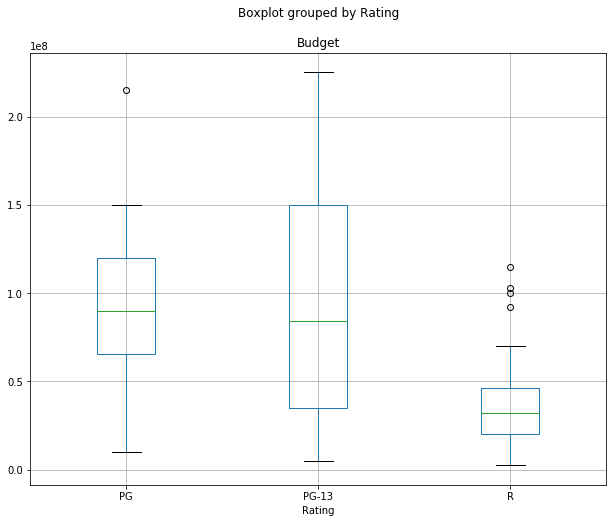

In [249]:
movies_df.boxplot(column='Budget', by='Rating', figsize=(10,8));

In [250]:
# Create feature matrix X and target vector y
y3, X3 = patsy.dmatrices('DomesticTotalGross ~ Budget + rating_R', data=movies_df, return_type="dataframe")

# Create OLS model
model3 = sm.OLS(y3, X3)
# Fit the model to the training set
fit3 = model3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     17.21
Date:                Sat, 03 Feb 2018   Prob (F-statistic):           5.16e-07
Time:                        23:19:33   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3482.
Df Residuals:                      86   BIC:                             3490.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.528e+07   1.76e+07      2.574      0.012    1.03e+07    8.02e+07
Budget         0.7795      0.151      5.156      0.000       0.479       1.080
rating_R   -1.343e+06   1.85e+07     -0.073      0.942   -3.81e+07    3.54e+07
==============================================================================
Omnibus:                       39.606   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.647
Skew:                           1.583   Prob(JB):                     3.79e-22
Kurtosis:                       7.071   Cond. No.                     2.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

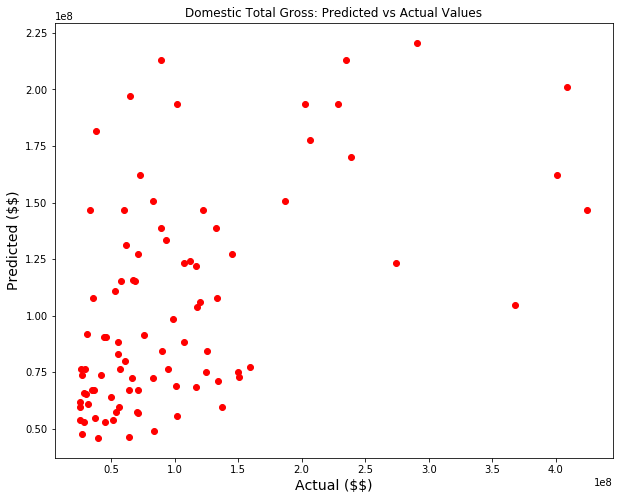

In [251]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y3,fit3.fittedvalues, 'ro');

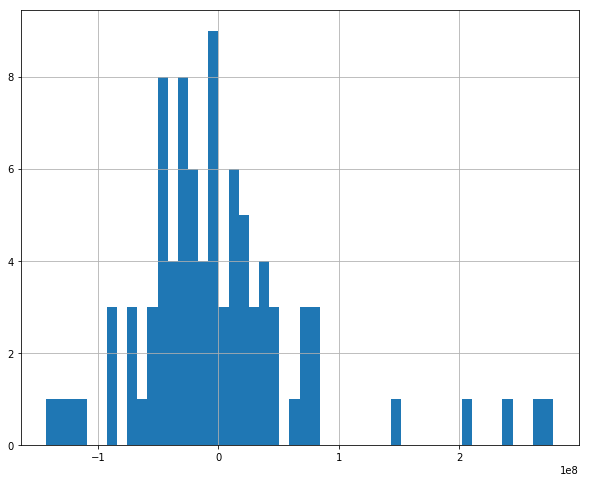

In [252]:
# Histogram of residuals
fit3.resid.hist(figsize=(10,8), bins=50);

In [253]:
movies_df['rating_R'].value_counts()

0    56
1    33
Name: rating_R, dtype: int64

Adding the dummy variables for Rating did not improve our model. The Adjusted R-squared slightly went down, and the t-statistic p-values for the coefficients of the Rating dummy variables are high above 0.05. The Ratings feature doesn't seem to help us predict Domestic Total Gross.

### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

-----------
Let's try adding Runtime feature to our model.

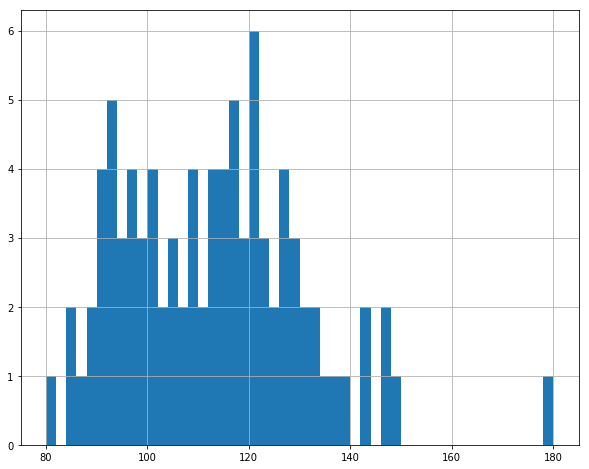

In [254]:
movies_df['Runtime'].hist(figsize=(10,8), bins=50);

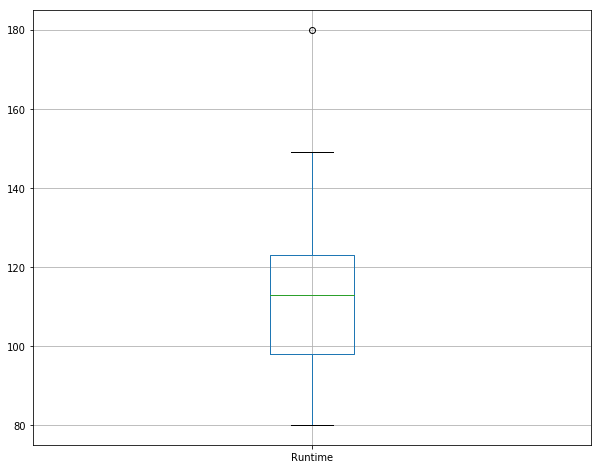

In [255]:
movies_df.boxplot(column='Runtime', figsize=(10,8));

It looks like there is one movie that is very long and is an outlier by Runtime. Let's drop it from the analysis data set.

In [256]:
movies_df = movies_df[movies_df['Runtime'] < movies_df['Runtime'].max()].copy()

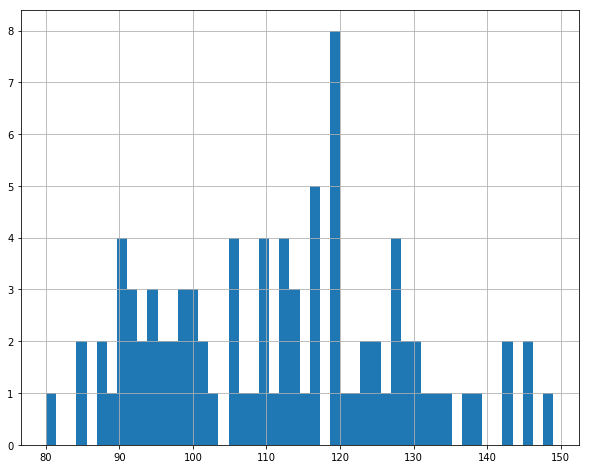

In [257]:
movies_df['Runtime'].hist(figsize=(10,8), bins=50);

Let's also look at the predicted variable distribution, DomesticTotalGross.

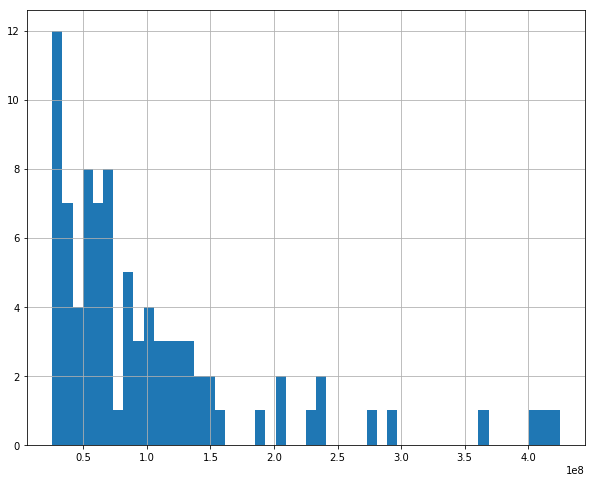

In [258]:
movies_df['DomesticTotalGross'].hist(figsize=(10,8), bins=50);

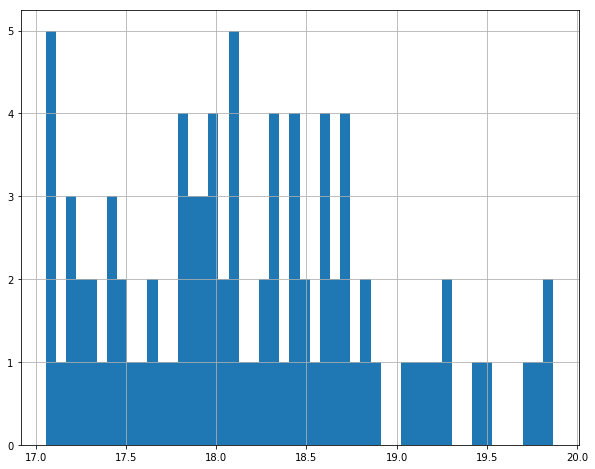

In [259]:
np.log(movies_df['DomesticTotalGross']).hist(figsize=(10,8), bins=50);

DomesticTotalGross distribution looks highly skewed, so let's try using a log transform of it in our model.

In [260]:
movies_df['log_DomesticTotalGross'] = movies_df['DomesticTotalGross'].apply(np.log)

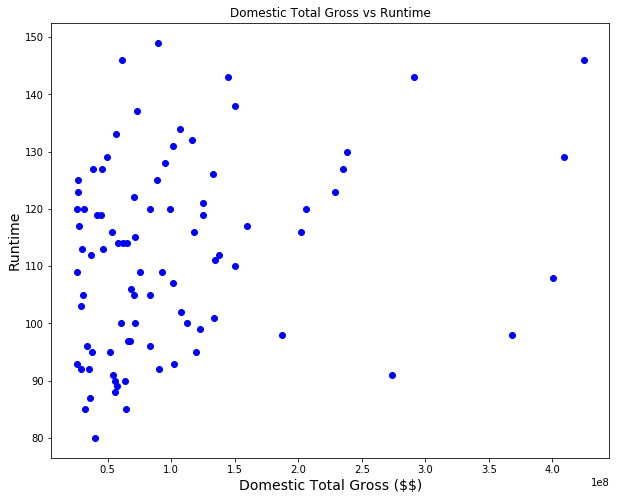

In [261]:
plt.figure(figsize=(10,8))
plt.ylabel('Runtime', fontsize=14)
plt.xlabel('Domestic Total Gross (\$\$)', fontsize=14)
plt.title("Domestic Total Gross vs Runtime")
plt.plot(movies_df['DomesticTotalGross'],movies_df['Runtime'], 'bo');

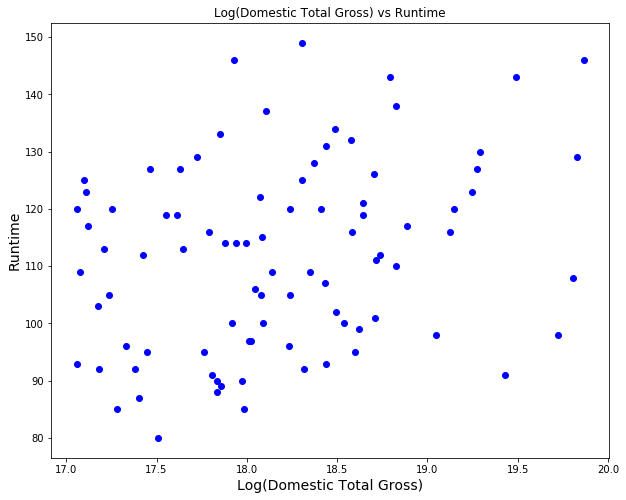

In [262]:
plt.figure(figsize=(10,8))
plt.ylabel('Runtime', fontsize=14)
plt.xlabel('Log(Domestic Total Gross)', fontsize=14)
plt.title("Log(Domestic Total Gross) vs Runtime")
plt.plot(movies_df['log_DomesticTotalGross'],movies_df['Runtime'], 'bo');

Another potential factor that could help us predict domestic total gross is the prior directing experience of the movie's director(s). The directing experience could be very roughly estimated by the number of director's directing credits before 2013 (this information is available on IMDB).  

Directing credits are not a very accurate way to capture directing experience, because they span different types of projects, for example, commercials vs movies. This could be improved by weighting the credits by the type of project, but that requires the data for the project types, which is not as easily available. I'm proceeding with just the simple counts of directing credits here, because that could still provide some information for the model.

In [263]:
movies_df['Director'].unique()

array(['Francis Lawrence', 'Shane Black', 'Chris BuckJennifer Lee',
       'Pierre CoffinChris Renaud', 'Zack Snyder', 'Alfonso Cuaron',
       'Justin Lin', 'Sam Raimi', 'J.J. Abrams', 'Alan Taylor',
       'Marc Forster', 'Kirk De MiccoChris Sanders', 'Paul Feig',
       'Rawson Marshall Thurber', 'David O. Russell', 'Baz Luhrmann',
       'James Wan', 'Seth Gordon', 'Dennis Dugan', 'James Mangold',
       'Adam McKay', 'Peter Berg', 'Jon Chu', nan, 'Louis Leterrier',
       'Lee Daniels', 'Todd Phillips', 'Chris Wedge', 'Paul Greengrass',
       'Jeff Tremaine', 'Guillermo del Toro', 'Evan GoldbergSeth Rogen',
       'Antoine Fuqua', 'Brian Helgeland', 'Neill Blomkamp', 'Klay Hall',
       'Gore Verbinski', 'Joseph Kosinski', 'John Lee Hancock',
       'David Soren', 'Baltasar Kormakur', 'Roland Emmerich',
       'Andres Muschietti', 'Lasse Hallstrom', 'Raja Gosnell',
       'Malcolm D. Lee', 'Thor Freudenthal', 'John Moore',
       'Jonathan Levine', 'Bryan Singer', 'James DeMonaco

In [264]:
# Remove obs with missing Director values
movies_df = movies_df[pd.notnull(movies_df.Director)]

In [265]:
movies_df = movies_df.copy()

In [266]:
# If multiple directors on a movie, then the director credits were added.
# Director credits source: IMDB
# Only including director credits counts prior to 2013 here
def director_credits(director):
    director_credits_dict = {'Francis Lawrence':46, 'Shane Black':1, 'Chris BuckJennifer Lee':3,
       'Pierre CoffinChris Renaud':9, 'Zack Snyder':8, 'Alfonso Cuaron':13,
       'Dan Scanlon':2, 'Peter Jackson':17, 'Justin Lin':12, 'Sam Raimi':30,
       'J.J. Abrams':11, 'Alan Taylor':29, 'Marc Forster':10,
       'Kirk De MiccoChris Sanders':3, 'Paul Feig':16,
       'Rawson Marshall Thurber':6, 'David O. Russell':9, 'Baz Luhrmann':13,
       'James Wan':7, 'Seth Gordon':12, 'Dennis Dugan':36, 'James Mangold':12,
       'Adam McKay':14, 'Peter Berg':15, 'Jon Chu':9, 'Louis Leterrier':5,
       'Martin Scorsese':52, 'Lee Daniels':3, 'Todd Phillips':12, 'Chris Wedge':5,
       'Paul Greengrass':16, 'Jeff Tremaine':11, 'Guillermo del Toro':10,
       'Evan GoldbergSeth Rogen':0, 'Antoine Fuqua':15, 'Brian Helgeland':5,
       'Neill Blomkamp':10, 'Klay Hall':7, 'Gore Verbinski':9, 'Joseph Kosinski':1,
       'John Lee Hancock':6, 'David Soren':1, 'Baltasar Kormakur':8,
       'Roland Emmerich':16, 'Andres Muschietti':3, 'Lasse Hallstrom':66,
       'Raja Gosnell':8, 'Malcolm D. Lee':7, 'Thor Freudenthal':9, 'John Moore':6,
       'Jonathan Levine':6, 'Bryan Singer':11, 'James DeMonaco':1,
       'Jon Turteltaub':16, 'Gavin Hood':9, 'Denis Villeneuve':11,
       'M. Night Shyamalan':9, 'Ben Stiller':13, 'Cal Brunker':1,
       'Steve McQueen (II)':25, 'Jimmy Hayward':2, 'Tommy Wirkola':4,
       'Fede Alvarez':4, 'Dean Parisot':29, 'Tyler Perry':27, 'Brad Anderson':23,
       'Michael Bay':50, 'Ruben Fleischer':14, 'Shawn Levy':31, 'Ric Roman Waugh':3,
       'David Twohy':7, 'Michael Tiddes':3, 'Carl Rinsch':3, 'John Wells':4,
       'Stephen Frears':55, 'Luc Besson':24, 'Barry CookNeil Nightingale':6,
       'Kimberly Peirce':5, 'John Luessenhop':3, 'Robert Schwentke':7,
       'Woody Allen':47, 'Steven Soderbergh':34, 'Harald Zwart':14, 'Ken Scott':2,
       'Peter Segal':17, 'Morgan Spurlock':10, 'Jeff Wadlow':5, 'Jean-Marc Vallee':10,
       'Ron Howard':31, 'Andrew Niccol':5, 'Edgar Wright':18,
       'Jon LucasScott Moore':0, 'Spike Jonze':91}
    return director_credits_dict[director]

In [267]:
movies_df['director_credits'] = movies_df['Director'].apply(lambda d: director_credits(d))

In [268]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,rating_PG,rating_PG13,rating_R,log_DomesticTotalGross,director_credits
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,0,1,0,19.866818,46
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,0,1,0,19.829260,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1,0,0,19.808818,3
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1,0,0,19.723760,9
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,0,1,0,19.488990,8


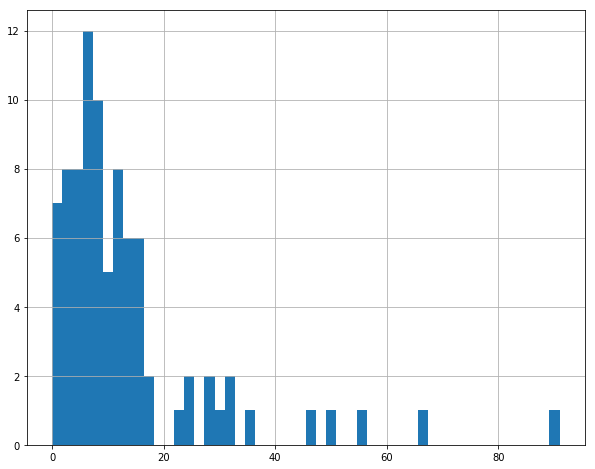

In [269]:
movies_df['director_credits'].hist(figsize=(10,8), bins=50);

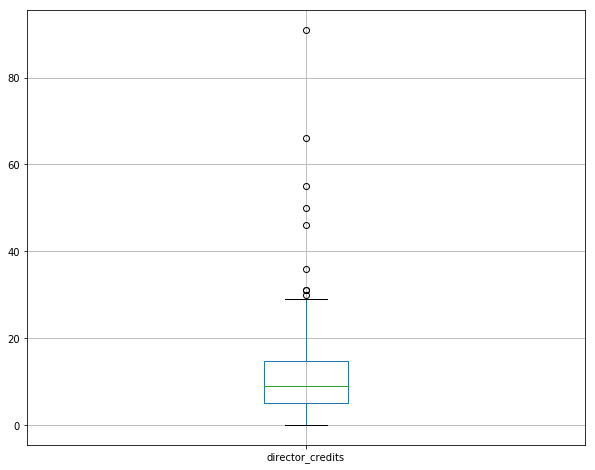

In [270]:
movies_df.boxplot(column='director_credits', figsize=(10,8));

In [271]:
movies_df = movies_df[movies_df['director_credits'] < movies_df['director_credits'].max()].copy()

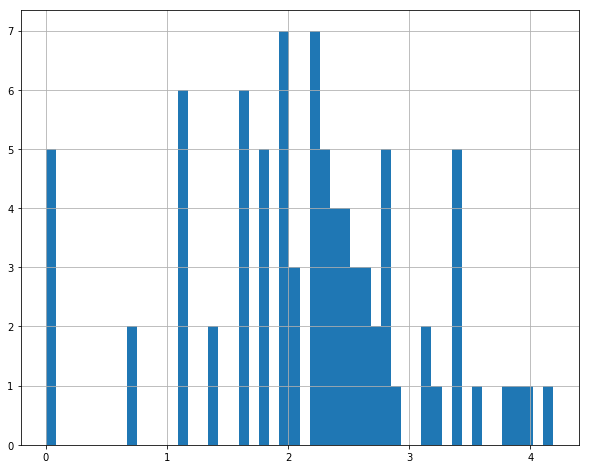

In [272]:
movies_df['log_director_credits'] = movies_df['director_credits'].apply(np.log)
movies_df2 = movies_df[movies_df.director_credits != 0]
movies_df2['log_director_credits'].hist(figsize=(10,8), bins=50);

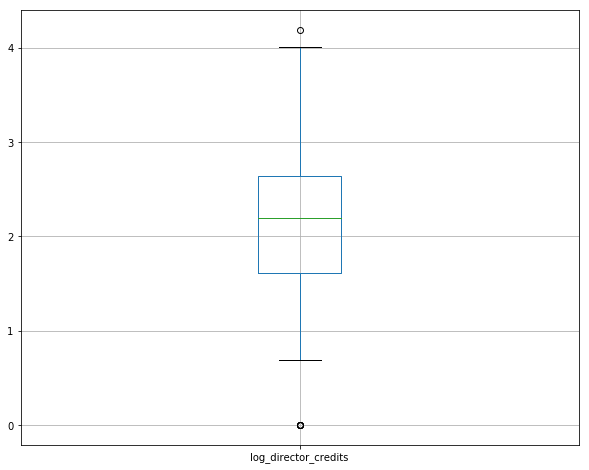

In [273]:
movies_df.boxplot(column='log_director_credits', figsize=(10,8));

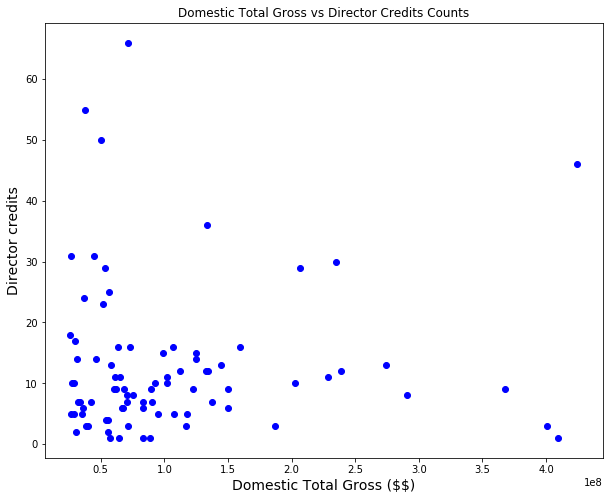

In [274]:
plt.figure(figsize=(10,8))
plt.ylabel('Director credits', fontsize=14)
plt.xlabel('Domestic Total Gross (\$\$)', fontsize=14)
plt.title("Domestic Total Gross vs Director Credits Counts")
plt.plot(movies_df2['DomesticTotalGross'],movies_df2['director_credits'], 'bo');

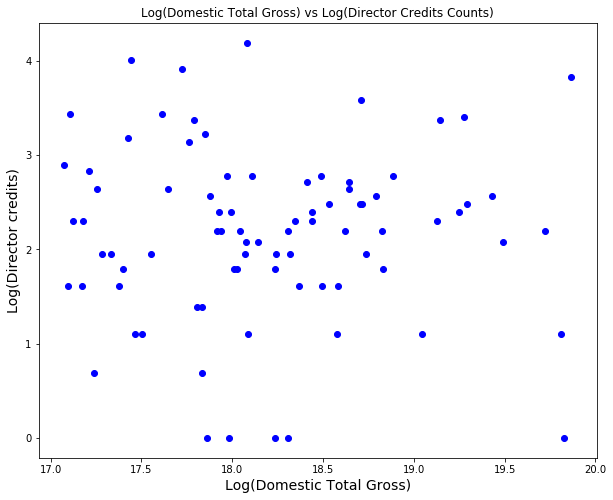

In [275]:
plt.figure(figsize=(10,8))
plt.ylabel('Log(Director credits)', fontsize=14)
plt.xlabel('Log(Domestic Total Gross)', fontsize=14)
plt.title("Log(Domestic Total Gross) vs Log(Director Credits Counts)")
plt.plot(movies_df2['log_DomesticTotalGross'],movies_df2['log_director_credits'], 'bo');

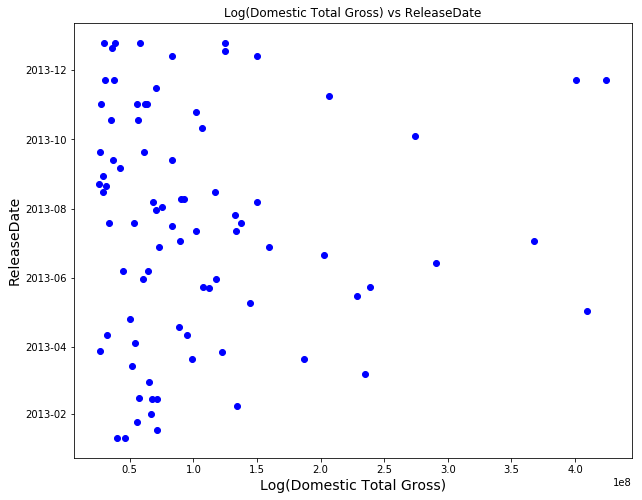

In [291]:
plt.figure(figsize=(10,8))
plt.ylabel('ReleaseDate', fontsize=14)
plt.xlabel('Log(Domestic Total Gross)', fontsize=14)
plt.title("Log(Domestic Total Gross) vs ReleaseDate")
plt.plot(movies_df2['DomesticTotalGross'],movies_df2['ReleaseDate'], 'bo');

In [294]:
movies_df2 = movies_df2.copy()

In [295]:
movies_df2['ReleaseDayOfWeek'] = movies_df2['ReleaseDate'].dt.dayofweek

In [297]:
movies_df2['ReleaseDayOfWeek'].value_counts()

4    66
2    12
3     5
Name: ReleaseDayOfWeek, dtype: int64

In [300]:
movies_df2['FridayReleaseDay'] = (movies_df2['ReleaseDayOfWeek'] == movies_df2['ReleaseDayOfWeek'].max()).astype(int)

C:\Users\Arina\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


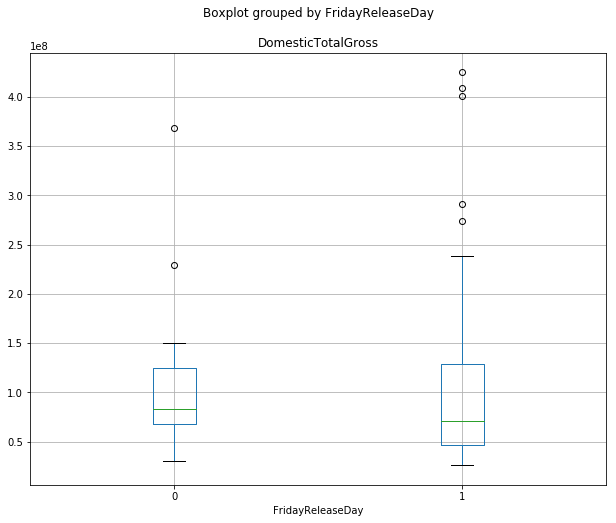

In [306]:
movies_df2.boxplot(column='DomesticTotalGross', by = 'FridayReleaseDay', figsize=(10,8));

Model using budget, R rating, runtime, Friday release day dummy variable, and log(director credits).

In [348]:
# Create feature matrix X and target vector y
y4, X4 = patsy.dmatrices('DomesticTotalGross ~ Budget + rating_R + Runtime + FridayReleaseDay + log_director_credits', data=movies_df2, return_type="dataframe")

# Create OLS model
model4 = sm.OLS(y4, X4)
# Fit the model to the training set
fit4 = model4.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     6.191
Date:                Sun, 04 Feb 2018   Prob (F-statistic):           7.11e-05
Time:                        00:29:54   Log-Likelihood:                -1622.7
No. Observations:                  83   AIC:                             3257.
Df Residuals:                      77   BIC:                             3272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.915e+07   6.24e+07     -0.307      0.760   -1.43e+08    1.05e+08
Budget                   0.7245      0.179      4.038      0.000       0.367       1.082
rating_R             -3.072e+06   2.05e+07     -0.150      0.881   -4.39e+07    3.78e+07
Runtime                 5.4e+05   6.03e+05      0.896      0.373    -6.6e+05    1.74e+06
FridayReleaseDay      1.542e+07   2.16e+07      0.715      0.477   -2.75e+07    5.84e+07
log_director_credits -1.422e+06   9.94e+06     -0.143      0.887   -2.12e+07    1.84e+07
==============================================================================
Omnibus:                       37.349   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.800
Skew:                           1.591   Prob(JB):                     8.60e-20
Kurtosis:                       6.907   Cond. No.                     7.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Budget and Runtime features have the highest p-values in the model.

In [425]:
# Create feature matrix X and target vector y
y4, X4 = patsy.dmatrices('log_DomesticTotalGross ~ Budget + Runtime', data=movies_df2, return_type="dataframe")

# Create OLS model
model4 = sm.OLS(y4, X4)
# Fit the model to the training set
fit4 = model4.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.296
Model:                                OLS   Adj. R-squared:                  0.278
Method:                     Least Squares   F-statistic:                     16.81
Date:                    Sun, 04 Feb 2018   Prob (F-statistic):           8.02e-07
Time:                            01:17:52   Log-Likelihood:                -74.215
No. Observations:                      83   AIC:                             154.4
Df Residuals:                          80   BIC:                             161.7
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1938      0.466     36.929      0.000      16.267      18.120
Budget      5.751e-09    1.2e-09      4.807      0.000    3.37e-09    8.13e-09
Runtime        0.0051      0.004      1.162      0.249      -0.004       0.014
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.650
Skew:                           0.155   Prob(JB):                        0.722
Kurtosis:                       2.696   Cond. No.                     6.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adding interaction terms.

In [446]:
# Create feature matrix X and target vector y
y4, X4 = patsy.dmatrices('log_DomesticTotalGross ~ Budget + Runtime*FridayReleaseDay*rating_R ', data=movies_df2, return_type="dataframe")

# Create OLS model
model4 = sm.OLS(y4, X4)
# Fit the model to the training set
fit4 = model4.fit()
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.387
Model:                                OLS   Adj. R-squared:                  0.321
Method:                     Least Squares   F-statistic:                     5.849
Date:                    Sun, 04 Feb 2018   Prob (F-statistic):           8.73e-06
Time:                            01:19:19   Log-Likelihood:                -68.443
No. Observations:                      83   AIC:                             154.9
Df Residuals:                          74   BIC:                             176.7
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            20.1205      1.356     14.840      0.000      17.419      22.822
Budget                             5.843e-09    1.4e-09      4.172      0.000    3.05e-09    8.63e-09
Runtime                              -0.0221      0.012     -1.844      0.069      -0.046       0.002
FridayReleaseDay                     -3.5597      1.474     -2.416      0.018      -6.496      -0.624
Runtime:FridayReleaseDay              0.0332      0.013      2.584      0.012       0.008       0.059
rating_R                             -5.9910      3.658     -1.638      0.106     -13.280       1.298
Runtime:rating_R                      0.0594      0.034      1.755      0.083      -0.008       0.127
FridayReleaseDay:rating_R             6.7502      3.769      1.791      0.077      -0.760      14.260
Runtime:FridayReleaseDay:rating_R    -0.0669      0.035     -1.932      0.057      -0.136       0.002
==============================================================================
Omnibus:                        1.582   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.568
Skew:                           0.252   Prob(JB):                        0.457
Kurtosis:                       2.554   Cond. No.                     8.01e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

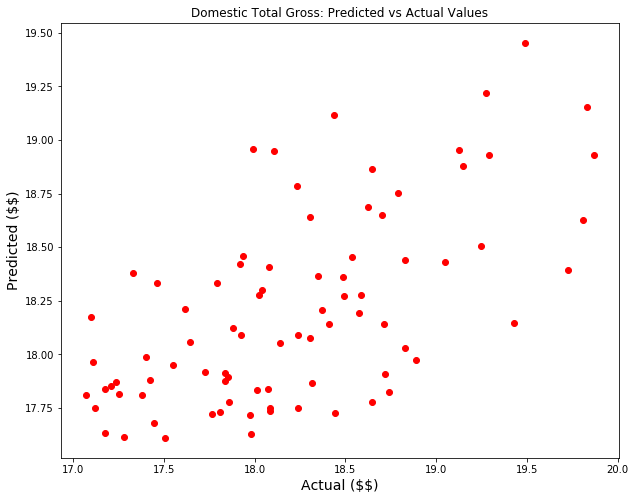

In [447]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y4,fit4.fittedvalues, 'ro');

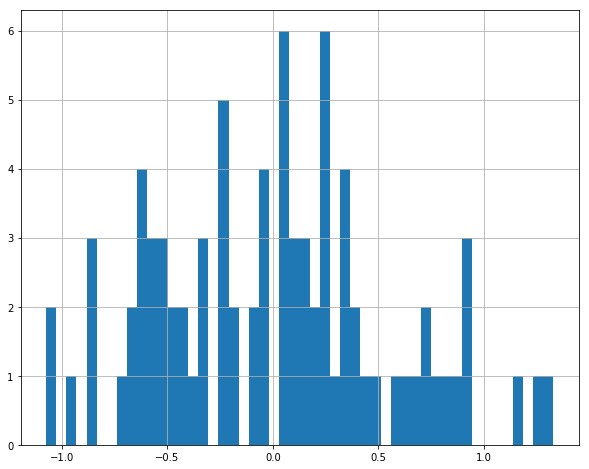

In [448]:
# Histogram of residuals
fit4.resid.hist(figsize=(10,8), bins=50);

Adding interaction terms has improved the model. The adjusted R-squared is a bit higher, though it's not very high overall. The p-values of individual features are significant at about 10% level, and the overall model is statistically significant. 

### Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [449]:
y4.head()

,log_DomesticTotalGross
0,19.866818
1,19.829260
2,19.808818
3,19.723760
4,19.488990


In [450]:
X4.head()

,Intercept,Budget,Runtime,FridayReleaseDay,Runtime:FridayReleaseDay,rating_R,Runtime:rating_R,FridayReleaseDay:rating_R,Runtime:FridayReleaseDay:rating_R
0,1.0,130000000.0,146.0,1.0,146.0,0.0,0.0,0.0,0.0
1,1.0,200000000.0,129.0,1.0,129.0,0.0,0.0,0.0,0.0
2,1.0,150000000.0,108.0,1.0,108.0,0.0,0.0,0.0,0.0
3,1.0,76000000.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,225000000.0,143.0,1.0,143.0,0.0,0.0,0.0,0.0


In [451]:
# Create an empty model
lr = LinearRegression()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X4.iloc[:, 1:], y4, test_size=0.25)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.19734620264755343

In [452]:
predictions = lr.predict(X_test)

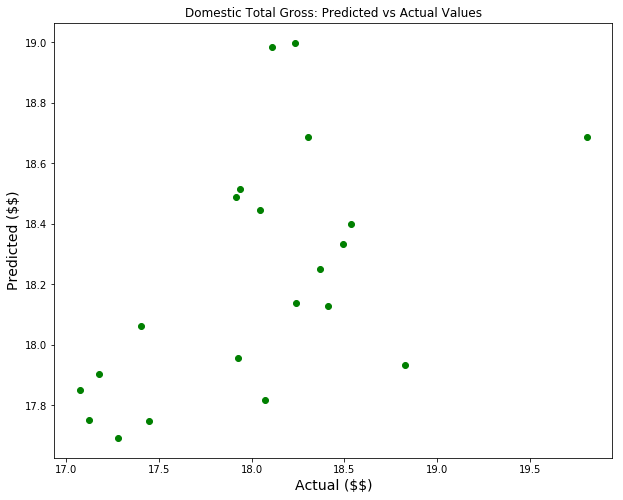

In [453]:
plt.figure(figsize=(10,8))
plt.ylabel('Predicted (\$\$)', fontsize=14)
plt.xlabel('Actual (\$\$)', fontsize=14)
plt.title("Domestic Total Gross: Predicted vs Actual Values")

plt.plot(y_test, predictions, 'go');